<a href="https://colab.research.google.com/github/AlexGreco1/knowledge/blob/main/Deep_learning_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Example - Iris 

This examples demonstrates the core deep learning model building concepts using the Keras library. The Iris flower dataset is used to build the model and perform classification tasks

#1. Setup

In [ ]:
#Install related libraries for the course. 
#This is a common requirement for all other exampels too

!pip install pandas
!pip install tensorflow
!pip install sklearn
!pip install matplotlib

     |████████████████████████████████| 462 kB 9.9 MB/s 


In [ ]:
#basic functions
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
import re
import warnings # Suppress warning for clean notebook

import tensorflow as tf
from tensorflow import keras

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris

warnings.filterwarnings('ignore')

In [ ]:

def rename_features(data):
  list_names_trans=[]

  list_names=data.columns

  for name in list_names:
    list_names_trans.append(re.sub("\s", "_", name))

  return list_names_trans


def change_position_first(variable_position,data):
  list_var=data.columns
  first_column = data.pop(list_var[variable_position])
  data.insert(0, list_var[variable_position], first_column)


def split_x_y(data):

    #after move the label data or y variable to the position 0 in the column arrange
    #label encond the variable y
    label_encoder = preprocessing.LabelEncoder()
    data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0])

    #Convert input to numpy array
    X_data = data.iloc[:,1:].to_numpy()
    Y_data = data.iloc[:,0].to_numpy()

    #how many unique categories does it have
    cat=data.iloc[:,0].nunique()
    
    #Separate feature and target variables
    #X_data = np_iris_x[:,:]  #all rows,from column 0:4
    #Y_data = np_iris_y[:,:]       #all rows,from column 4  
    
    #Create a scaler model that is fit on the input data.
    scaler = StandardScaler().fit(X_data)
    
    #Scale the numeric feature variables
    X_data = scaler.transform(X_data)


    #Convert target variable as a one-hot-encoding array
    Y_data = tf.keras.utils.to_categorical(Y_data,cat) # there are 3 categories

    #print("X_data")
    #print(X_data)
    #print("Y_data")
    #print(Y_data)

    #Return Feature and Target variables
    return X_data,Y_data


def label_encoder_fun(dependen_variable_y,data):
  label_encoder = preprocessing.LabelEncoder()
  data[dependen_variable_y] = label_encoder.fit_transform(data[dependen_variable_y])

#def n_cat_y(variable_name,data):
#  dep=variable_name
#  cat=data[dep].nunique()
#  return cat


def data_exploring(data):
  #explore dataset
    print(f'data.shape {data.shape}')
    print(f'data.nunique() {data.nunique()}')
    print(f'data.isna().sum() {data.isna().sum()}')


def fullfill_na_0(list_columns,data):
    
    # to fullfill with 0
    #cols_to_fill_zero = ['Sepal.lengh','Sepal.width']
    #cols_to_fill_zero=list_columns
    data[list_columns] = data[list_columns].fillna(0)

    #data.isna().sum()

    #iris_data.rename(columns={'Petal_Length':'Petal.Length'})
    # to fullfill with avg #check 

def fullfill_avg(column_name,data):
    # to fullfill with 0
    #cols_to_fill_zero = ['Sepal.lengh','Sepal.width']
    #cols_to_fill_zero=list_columns
    data[column_name] = data[column_name].fillna(data[column_name].mean())    
    #iris_data['Petal.Length'] = iris_data['Petal.Length'].fillna(iris_data[['Petal.Length']].mean())
    #iris_data['Petal.Length'] = iris_data['Petal.Length'].fillna(iris_data['Petal.Length'].mean())
    #iris_data.isna().sum()

def drop_null(data):
    #drop null

    data.dropna(inplace=True)
    #iris_data.isna().sum()

    
    #Convert target variable as a one-hot-encoding array
    #Y_data = tf.keras.utils.to_categorical(Y_data,3) # there is 3 categories


def get_data(file_name,y_variable_position):
    
    data = pd.read_csv(file_name)
    
    rename_features(data)

    change_position_first(y_variable_position,data)

    data_exploring(data)


#---------------------------------------------------------------------
#Function to create the default configuration for the model. This will be overridden as 
#required during experimentation
#---------------------------------------------------------------------
def base_model_config():
    model_config = {
            "HIDDEN_NODES" : [32,64],
            "HIDDEN_ACTIVATION" : "relu",
            "OUTPUT_NODES" : 3,
            "OUTPUT_ACTIVATION" : "softmax",
            "WEIGHTS_INITIALIZER" : "random_normal",
            "BIAS_INITIALIZER" : "zeros",
            "NORMALIZATION" : "none",
            "OPTIMIZER" : "rmsprop",
            "LEARNING_RATE" : 0.001,
            "REGULARIZER" : None,
            "DROPOUT_RATE" : 0.0,
            "EPOCHS" : 10,
            "BATCH_SIZE" : 16,
            "VALIDATION_SPLIT" : 0.2,
            "VERBOSE" : 0,
            "LOSS_FUNCTION" : "categorical_crossentropy",
            "METRICS" : ["accuracy"]
            }
    return model_config


#---------------------------------------------------------------------
#Function to plot a graph based on the results derived
#---------------------------------------------------------------------

def plot_graph(accuracy_measures, title):
    
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(15, 8))
    for experiment in accuracy_measures.keys():
        plt.plot(accuracy_measures[experiment], 
                 label=experiment,
                    linewidth=3)
        
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
    



---

In [ ]:
#test.

iris_data = pd.read_csv("iris.csv")

print(iris_data.head())

change_position_first(4,iris_data)




iris_data.iloc[0,1]=np.nan

drop_null(iris_data)

print(iris_data.head())

#print(iris_data.columns)

#l=['Sepal.Length']

#fullfill_na_0(l,iris_data)
#fullfill_avg(l,iris_data)

#iris_data.head()

#label_encoder = preprocessing.LabelEncoder()
#iris_data.iloc[:,0] = label_encoder.fit_transform(iris_data.iloc[:,0])

#x,y=split_x_y(iris_data)



#print(x)
#print(y)
#iris_data.head()

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
  Species  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
1  setosa           4.9          3.0           1.4          0.2
2  setosa           4.7          3.2           1.3          0.2
3  setosa           4.6          3.1           1.5          0.2
4  setosa           5.0          3.6           1.4          0.2
5  setosa           5.4          3.9           1.7          0.4


In [ ]:
#basic functions


#---------------------------------------------------------------------
#Function to read data and process. Get ready for Deep Learning
#---------------------------------------------------------------------

def rename_features(list_names):
  list_names_trans=[]

  for name in list_names:
    list_names_trans.append(re.sub("\s", "_", name))

  return list_names_trans


def get_data():
    
    iris_data = pd.read_csv("iris.csv")
    
    #iris_data.dtypes
    #iris_data.describe()
    #iris_data.head()

    
    
    #Use a Label encoder to convert String to numeric values for the target variable

    label_encoder = preprocessing.LabelEncoder()
    #iris_data['Species'] = label_encoder.fit_transform(iris_data['Species'])
    dependen_variable_y = label_encoder.fit_transform(dependen_variable_y)

    first_column = df.pop('e')
    df.insert(0, 'e', first_column)
    
    #Convert input to numpy array
    np_iris = iris_data.to_numpy()
    
    #Separate feature and target variables
    X_data = np_iris[:,0:4].  #all rows,from column 0:4
    Y_data=np_iris[:,4]       #all rows,from column 4  
    
    #Create a scaler model that is fit on the input data.
    scaler = StandardScaler().fit(X_data)
    
    #Scale the numeric feature variables
    X_data = scaler.transform(X_data)

    #explore dataset
    iris_data.nunique()
    iris_data.shape
    iris_data.isna().sum()

    # to fullfill with 0
    cols_to_fill_zero = ['Sepal.lengh','Sepal.width']
    iris_data[cols_to_fill_zero] = iris_data[cols_to_fill_zero].fillna(0)

    iris_data.isna().sum()

    #iris_data.rename(columns={'Petal_Length':'Petal.Length'})
    # to fullfill with avg #check 
    
    iris_data['Petal.Length'] = iris_data['Petal.Length'].fillna(iris_data[['Petal.Length']].mean())
    iris_data['Petal.Length'] = iris_data['Petal.Length'].fillna(iris_data['Petal.Length'].mean())
    iris_data.isna().sum()

    #drop null

    iris_data.dropna(inplace=True)
    iris_data.isna().sum()

    
    #Convert target variable as a one-hot-encoding array
    Y_data = tf.keras.utils.to_categorical(Y_data,3) # there is 3 categories

    #Return Feature and Target variables
    return X_data,Y_data

#explore and transform data:




#---------------------------------------------------------------------
#Function to create the default configuration for the model. This will be overridden as 
#required during experimentation
#---------------------------------------------------------------------
def base_model_config():
    model_config = {
            "HIDDEN_NODES" : [32,64],
            "HIDDEN_ACTIVATION" : "relu",
            "OUTPUT_NODES" : 3,
            "OUTPUT_ACTIVATION" : "softmax",
            "WEIGHTS_INITIALIZER" : "random_normal",
            "BIAS_INITIALIZER" : "zeros",
            "NORMALIZATION" : "none",
            "OPTIMIZER" : "rmsprop",
            "LEARNING_RATE" : 0.001,
            "REGULARIZER" : None,
            "DROPOUT_RATE" : 0.0,
            "EPOCHS" : 10,
            "BATCH_SIZE" : 16,
            "VALIDATION_SPLIT" : 0.2,
            "VERBOSE" : 0,
            "LOSS_FUNCTION" : "categorical_crossentropy",
            "METRICS" : ["accuracy"]
            }
    return model_config

#---------------------------------------------------------------------
# Function to create an optimizer based on the optimizer name and learning rate
#---------------------------------------------------------------------
def get_optimizer(optimizer_name, learning_rate):
    #'sgd','rmsprop','adam','adagrad'
    optimizer=None
    
    if optimizer_name == 'adagrad': 
        optimizer = keras.optimizers.Adagrad(learning_rate=learning_rate)

    elif 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)

    elif'adam' :
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
        
    else :
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
            
    return optimizer
    
    
#---------------------------------------------------------------------
# Function to create a model and fit the model
#---------------------------------------------------------------------

def create_and_run_model(model_config,X,Y,model_name) :
    
    model=tf.keras.models.Sequential(name=model_name)
    
    for layer in range(len(model_config["HIDDEN_NODES"])):
        
        if (layer == 0):
            model.add(
                    keras.layers.Dense(model_config["HIDDEN_NODES"][layer],
                    input_shape=(X.shape[1],),
                    name="Dense-Layer-" + str(layer),
                    kernel_initializer = model_config["WEIGHTS_INITIALIZER"],
                    bias_initializer = model_config["BIAS_INITIALIZER"],
                    kernel_regularizer=model_config["REGULARIZER"],
                    activation=model_config["HIDDEN_ACTIVATION"]))
        else:
            
            if ( model_config["NORMALIZATION"] == "batch"):
                model.add(keras.layers.BatchNormalization())
                
            if ( model_config["DROPOUT_RATE"] > 0.0 ):
                model.add(keras.layers.Dropout(model_config["DROPOUT_RATE"]))
                
            model.add(
                    keras.layers.Dense(model_config["HIDDEN_NODES"][layer],
                    name="Dense-Layer-" + str(layer),
                    kernel_initializer = model_config["WEIGHTS_INITIALIZER"],
                    bias_initializer = model_config["BIAS_INITIALIZER"],
                    kernel_regularizer=model_config["REGULARIZER"],
                    activation=model_config["HIDDEN_ACTIVATION"])) 
            

            
    model.add(keras.layers.Dense(model_config["OUTPUT_NODES"],
                    name="Output-Layer",
                    activation=model_config["OUTPUT_ACTIVATION"]))
    
    optimizer = get_optimizer( model_config["OPTIMIZER"],
                              model_config["LEARNING_RATE"])
    
    model.compile(loss=model_config["LOSS_FUNCTION"],
                  optimizer=optimizer,
                   metrics=model_config["METRICS"])
    
    print("\n******************************************************")
    model.summary()
    
    X_train, X_val, Y_train, Y_val =train_test_split(
                        X,Y,
                        stratify=Y,
                        random_state=42,
                        test_size=model_config["VALIDATION_SPLIT"]) 
    
    history=model.fit(X_train,
          Y_train,
          batch_size=model_config["BATCH_SIZE"],
          epochs=model_config["EPOCHS"],
          verbose=model_config["VERBOSE"],
          validation_data= (X_val, Y_val))
    
    return history

#---------------------------------------------------------------------
#Function to plot a graph based on the results derived
#---------------------------------------------------------------------

def plot_graph(accuracy_measures, title):
    
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(15, 8))
    for experiment in accuracy_measures.keys():
        plt.plot(accuracy_measures[experiment], 
                 label=experiment,
                    linewidth=3)
        
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
    

In [ ]:
model_config["WEIGHTS_INITIALIZER"],

In [ ]:
#now in a matrix.

optimizations=["HIDDEN_NODES",
               "NODES",
               "BATCH_SIZE",
               "EPOCHS"
               "WEIGHTS_INITIALIZER",
               "HIDDEN_ACTIVATION",
               "OPTIMIZER",
               "BATCH_NORMALIZATION",
               "LEARNING_RATE",
               "REGULARIZER",
               "DROPOUT_RATE"] 

accuracy_measures = {}

 model_config = {
            "HIDDEN_NODES" : [32,64],
            "HIDDEN_ACTIVATION" : "relu",
            "OUTPUT_NODES" : 3,
            "OUTPUT_ACTIVATION" : "softmax",
            "WEIGHTS_INITIALIZER" : "random_normal",
            "BIAS_INITIALIZER" : "zeros",
            "NORMALIZATION" : "none",
            "OPTIMIZER" : "rmsprop",
            "LEARNING_RATE" : 0.001,
            "REGULARIZER" : None,
            "DROPOUT_RATE" : 0.0,
            "EPOCHS" : 10,
            "BATCH_SIZE" : 16,
            "VALIDATION_SPLIT" : 0.2,
            "VERBOSE" : 0,
            "LOSS_FUNCTION" : "categorical_crossentropy",
            "METRICS" : ["accuracy"]
            }

In [ ]:
#the big one

initializer_list = ['random_normal','zeros','ones',"random_uniform"]
normalization_list = ['none','batch']
optimizer_list = ['sgd','rmsprop','adam','adagrad']
learning_rate_list = [0.001, 0.005,0.01,0.1,0.5]
regularizer_list = ['l1','l2','l1_l2']

losses_list=[]
"""Available losses
Note that all losses are available both via a class handle and via a function handle. The class handles enable you to pass configuration arguments to the constructor (e.g. loss_fn = CategoricalCrossentropy(from_logits=True)), and they perform reduction by default when used in a standalone way (see details below).

Probabilistic losses

BinaryCrossentropy class
CategoricalCrossentropy class
SparseCategoricalCrossentropy class
Poisson class
binary_crossentropy function
categorical_crossentropy function
sparse_categorical_crossentropy function
poisson function
KLDivergence class
kl_divergence function


Regression losses

MeanSquaredError class
MeanAbsoluteError class
MeanAbsolutePercentageError class
MeanSquaredLogarithmicError class
CosineSimilarity class
mean_squared_error function
mean_absolute_error function
mean_absolute_percentage_error function
mean_squared_logarithmic_error function
cosine_similarity function
Huber class
huber function
LogCosh class
log_cosh function

Hinge losses for "maximum-margin" classification

Hinge class
SquaredHinge class
CategoricalHinge class
hinge function
squared_hinge function
categorical_hinge function
"""
metrics_list=[]
"""Available metrics

Accuracy metrics

Accuracy class
BinaryAccuracy class
CategoricalAccuracy class
SparseCategoricalAccuracy class
TopKCategoricalAccuracy class
SparseTopKCategoricalAccuracy class

Probabilistic metrics

BinaryCrossentropy class
CategoricalCrossentropy class
SparseCategoricalCrossentropy class
KLDivergence class
Poisson class
Regression metrics
MeanSquaredError class
RootMeanSquaredError class
MeanAbsoluteError class
MeanAbsolutePercentageError class
MeanSquaredLogarithmicError class
CosineSimilarity class
LogCoshError class

Classification metrics based on True/False positives & negatives

AUC class
Precision class
Recall class
TruePositives class
TrueNegatives class
FalsePositives class
FalseNegatives class
PrecisionAtRecall class
SensitivityAtSpecificity class
SpecificityAtSensitivity class

Image segmentation metrics

MeanIoU class
Hinge metrics for "maximum-margin" classification
Hinge class
SquaredHinge class
CategoricalHinge class

"""


#Add the first hidden layer
layer_0="model.add(keras.layers.Dense("128,
first_layer={input_shape:(4,),
             name:'Hidden-Layer-1',
             activation:'relu'} "   

other_layer={input_shape:(4,),
             name:'Hidden-Layer-1',
             activation:'relu'} "   


                            #Add a second hidden layer
                            model.add(keras.layers.Dense(128,
                                                          name='Hidden-Layer-2',
                                                          activation='relu'))

                            #Add an output layer with softmax activation
                            model.add(keras.layers.Dense(NB_CLASSES,
                                                        name='Output-Layer',
                                                        activation='softmax'))

for hidden_node_layers in range(1,20):
  for node in range(1,200):
    for activation_fucntions in activation_list:
      for loss_fun in loss_list:
        for batches in range(1,200)
          for epochs in range(1,200):
            for validation_split in range(0.05,0.5,0.01):
              for WEIGHTS_INITIALIZER in initializer_list:
                for BIAS_INITIALIZER in initializer_list: #not sure
                  for NORMALIZATION in normalization_list:
                    for OPTIMIZER in optimizer_list:
                      for LEARNING_RATE in range(0.001,0.5,0.005):#this is too big but just to do it onces
                        for REGULARIZER in regularizer_list:
                          for DROPOUT_RATE in range(0.0,0.5,0.01):

                            accuracy_measures = {}
                            #layer_list =[]

                            model = tf.keras.models.Sequential()

                            #Add the first hidden layer
                            model.add(keras.layers.Dense(128,                    #Number of nodes
                                                        input_shape=(4,),       #Number of input variables
                                                          name='Hidden-Layer-1', #Logical name
                                                          activation='relu'))    #activation function

                            #Add a second hidden layer
                            model.add(keras.layers.Dense(128,
                                                          name='Hidden-Layer-2',
                                                          activation='relu'))

                            #Add an output layer with softmax activation
                            model.add(keras.layers.Dense(NB_CLASSES,
                                                        name='Output-Layer',
                                                        activation='softmax'))

                            #Compile the model with loss & metrics
                            model.compile(loss='categorical_crossentropy',
                                          metrics=['accuracy'])

                            #Print the model meta-data
                            model.summary()


                            for layer_count in range(1,6):
                                
                                #32 nodes in each layer
                                #layer_list.append(32)
                                
                                model_config = base_model_config()
                                X,Y = get_rca_data()
                                
                                model_config["HIDDEN_NODES"] = layer_list
                                model_name = "Layers-" + str(layer_count)
                                history=create_and_run_model(model_config,X,Y,model_name)
                                
                                accuracy_measures[model_name] = history.history["accuracy"]
                            
           





  #------create model
  #Create a sequencial model in Keras
  model = tf.keras.models.Sequential()

  #Add the first hidden layer
  model.add(keras.layers.Dense(128,                    #Number of nodes
                             input_shape=(4,),       #Number of input variables
                              name='Hidden-Layer-1', #Logical name
                              activation='relu'))    #activation function

  #Add a second hidden layer
  model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'))

  #Add an output layer with softmax activation
  model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

  #Compile the model with loss & metrics
  model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

  #Print the model meta-data
  model.summary()


  #------train the model

  #Make it verbose so we can see the progress
  VERBOSE=1

  #Setup Hyper Parameters for training

  #Set Batch size
  BATCH_SIZE=16
  #Set number of epochs
  EPOCHS=10
  #Set validation split. 20% of the training data will be used for validation
  #after each epoch
  VALIDATION_SPLIT=0.2

  print("\nTraining Progress:\n------------------------------------")

  #Fit the model. This will perform the entire training cycle, including
  #forward propagation, loss computation, backward propagation and gradient descent.
  #Execute for the specified batch sizes and epoch
  #Perform validation after each epoch 
  history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

  print("\nAccuracy during Training :\n------------------------------------")
  import matplotlib.pyplot as plt

  #Plot accuracy of the model after each epoch.
  pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
  plt.title("Accuracy improvements with Epoch")
  plt.show()

  #Evaluate the model against the test dataset and print results
  print("\nEvaluation against Test Dataset :\n------------------------------------")
  model.evaluate(X_test,Y_test)

  #------Saving a model
    
  model.save("iris_save")
      
  #Loading a Model 
  loaded_model = keras.models.load_model("iris_save")

  #Print Model Summary
  loaded_model.summary()


### 4.3. Creating a Model

Creating a model in Keras requires defining the following

1. Number of hidden layers
2. Number of nodes in each layer
3. Activation functions
4. Loss Function & Accuracy measurements

In [ ]:

from tensorflow import keras

#Number of classes in the target variable
NB_CLASSES=3

#Create a sequencial model in Keras
model = tf.keras.models.Sequential()

#Add the first hidden layer
model.add(keras.layers.Dense(128,                    #Number of nodes
                             input_shape=(4,),       #Number of input variables
                              name='Hidden-Layer-1', #Logical name
                              activation='relu'))    #activation function

#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'))

#Add an output layer with softmax activation
model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

#Compile the model with loss & metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

#Print the model meta-data
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


### 4.4. Training and evaluating the Model

Training the model involves defining various training models and then perform 
forward and back propagation.


Training Progress:
------------------------------------
Epoch 1/10
7/7 [==============================] - 8s 160ms/step - loss: 0.7753 - accuracy: 0.7500 - val_loss: 0.5343 - val_accuracy: 0.9259
Epoch 2/10
7/7 [==============================] - 0s 21ms/step - loss: 0.5095 - accuracy: 0.8148 - val_loss: 0.3958 - val_accuracy: 0.8889
Epoch 3/10
7/7 [==============================] - 0s 21ms/step - loss: 0.4187 - accuracy: 0.8148 - val_loss: 0.3284 - val_accuracy: 0.8889
Epoch 4/10
7/7 [==============================] - 0s 29ms/step - loss: 0.3638 - accuracy: 0.8519 - val_loss: 0.2816 - val_accuracy: 0.9259
Epoch 5/10
7/7 [==============================] - 0s 24ms/step - loss: 0.3299 - accuracy: 0.8704 - val_loss: 0.2525 - val_accuracy: 0.8889
Epoch 6/10
7/7 [==============================] - 0s 25ms/step - loss: 0.2946 - accuracy: 0.8796 - val_loss: 0.2269 - val_accuracy: 0.9259
Epoch 7/10
7/7 [==============================] - 0s 33ms/step - loss: 0.2738 - accuracy: 0.8889 - val_loss:

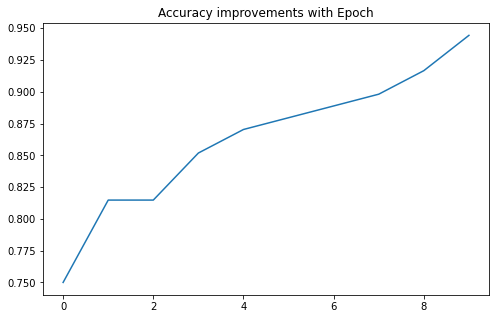


Evaluation against Test Dataset :
------------------------------------
1/1 [==============================] - 0s 84ms/step - loss: 0.1882 - accuracy: 0.8667


[0.18818838894367218, 0.8666666746139526]

In [ ]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=16
#Set number of epochs
EPOCHS=10
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")

#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch 
history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)

### 4.5. Saving and Loading Models

The training and inference environments are usually separate. Models need to be saved after they are validated. They are then loaded into the inference environments for actual prediction

In [ ]:
#Saving a model
    
model.save("iris_save")
    
#Loading a Model 
loaded_model = keras.models.load_model("iris_save")

#Print Model Summary
loaded_model.summary()

INFO:tensorflow:Assets written to: iris_save/assets


INFO:tensorflow:Assets written to: iris_save/assets


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3,random_state=2) #0.3 is 30% reserved for test. Popular integer random seeds are 0 and 42.

In [ ]:
#regular linera regression model

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(train_X,train_y)


In [ ]:
reg.score(test_X,test_y)

0.9286086986856662

In [ ]:
reg.score(train_X,train_y)

#if the training value is high compare with the test this indicate is overfiting


0.9295652965670188

In [ ]:
#L1 is lasso Add a absolute theta value in the error (MSE)

from sklearn import linear_model

lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1) #alpha ini random 50
lasso_reg.fit(train_X,train_y)


Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
lasso_reg.score(test_X,test_y)

-0.02447755713979749

In [ ]:
lasso_reg.score(train_X,train_y)
# in this cases ins not effective beacuse is not over fitting

0.0

In [ ]:
# L2 Ridge
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1) #alpha ini random 50
ridge_reg.fit(train_X,train_y)


Ridge(alpha=50, max_iter=100, tol=0.1)

In [ ]:
ridge_reg.score(test_X,test_y)

0.9099374641894389

In [ ]:
ridge_reg.score(train_X,train_y)
# in this cases is effective reducing score beacuse

0.894234096271269

In [ ]:
#HIDDEN_NODES

accuracy_measures = {}
layer_list =[]


for layer_count in range(1,6):
    
    #32 nodes in each layer
    layer_list.append(32)
    
    model_config = base_model_config()
    X,Y = get_rca_data()
    
    model_config["HIDDEN_NODES"] = layer_list
    model_name = "Layers-" + str(layer_count)
    history=create_and_run_model(model_config,X,Y,model_name)
    
    accuracy_measures[model_name] = history.history["accuracy"]


#NODES
accuracy_measures = {}

for node_count in range(8,40,8):
    
    #have 2 hidden layers in the networks
    layer_list =[]
    for layer_count in range(2):
        layer_list.append(node_count)
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["HIDDEN_NODES"] = layer_list
    model_name = "Nodes-" + str(node_count)
    history=create_and_run_model(model_config,X,Y, model_name)
    
    accuracy_measures[model_name] = history.history["accuracy"]


#Batch size 
accuracy_measures = {}

for batch_size in range(16,128,16):
    
    #Load default configuration
    model_config = base_model_config()
    #Acquire and process input data
    X,Y = get_data()
    
    #set epoch to 20
    model_config["EPOCHS"]=20
    #Set batch size to experiment value
    model_config["BATCH_SIZE"] = batch_size
    model_name = "Batch-Size-" + str(batch_size)
    history=create_and_run_model(model_config,X,Y,model_name)
    
    accuracy_measures[model_name] = history.history["accuracy"]



#Epoch size create...
accuracy_measures = {}

for batch_size in range(16,128,16):
    
    #Load default configuration
    model_config = base_model_config()
    #Acquire and process input data
    X,Y = get_data()
    
    #set epoch to 20
    model_config["EPOCHS"]=20
    #Set batch size to experiment value
    model_config["BATCH_SIZE"] = batch_size
    model_name = "Batch-Size-" + str(batch_size)
    history=create_and_run_model(model_config,X,Y,model_name)
    
    accuracy_measures[model_name] = history.history["accuracy"]

#Weights Initialization

accuracy_measures = {}

initializer_list = ['random_normal','zeros','ones',"random_uniform"]
for initializer in initializer_list:
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["WEIGHTS_INITIALIZER"] = initializer
    model_name = "Model-" + initializer
    history=create_and_run_model(model_config,X,Y, model_name)
    
    accuracy_measures[model_name] = history.history["accuracy"]




#activation function 

accuracy_measures = {}

activation_list = ['relu','sigmoid','tanh']

for activation in activation_list:
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["HIDDEN_ACTIVATION"] = activation
    model_name = "Model-" + activation
    history=create_and_run_model(model_config,X,Y,model_name)
    
    accuracy_measures["Model-" + activation] = history.history["accuracy"]



#optimizer 
accuracy_measures = {}

optimizer_list = ['sgd','rmsprop','adam','adagrad']
for optimizer in optimizer_list:
    
    model_config = base_model_config()
    X,Y = get_rca_data()
    
    model_config["OPTIMIZER"] = optimizer
    model_name = "Optimizer-" + optimizer
    history=create_and_run_model(model_config,X,Y, model_name)
    
    accuracy_measures[model_name] = history.history["accuracy"]


#Batch Normalization

accuracy_measures = {}

normalization_list = ['none','batch']
for normalization in normalization_list:
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["NORMALIZATION"] = normalization
    model_name="Normalization-" + normalization
    history=create_and_run_model(model_config,X,Y,model_name)
    
    accuracy_measures[model_name] = history.history["accuracy"]





#Learning Rates

accuracy_measures = {}

learning_rate_list = [0.001, 0.005,0.01,0.1,0.5]
for learning_rate in learning_rate_list:
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["LEARNING_RATE"] = learning_rate
    model_name="Learning-Rate-" + str(learning_rate)
    history=create_and_run_model(model_config,X,Y, model_name)
    
    #accuracy
    accuracy_measures[model_name] = history.history["accuracy"]


# Regularization

accuracy_measures = {}

regularizer_list = ['l1','l2','l1_l2']
for regularizer in regularizer_list:
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["REGULARIZER"] = regularizer
    model_config["EPOCHS"]=25
    model_name = "Regularizer-" + regularizer
    history=create_and_run_model(model_config,X,Y, model_name)
    
    #Switch to validation accuracy
    accuracy_measures[model_name] = history.history["val_accuracy"]



# Dropout

accuracy_measures = {}

dropout_list = [0.0, 0.1, 0.2, 0.5]
for dropout in dropout_list:
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["DROPOUT_RATE"] = dropout
    model_config["EPOCHS"]=25
    model_name="Dropout-" + str(dropout)
    history=create_and_run_model(model_config,X,Y, model_name)
    
    #Using validation accuracy
    accuracy_measures[model_name] = history.history["val_accuracy"]


#


******************************************************
Model: "Layers-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                256       
                                                                 
 Output-Layer (Dense)        (None, 3)                 99        
                                                                 
Total params: 355
Trainable params: 355
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Layers-2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                256       
                                                                 
 Dense-Layer-1 (Dense)       (None, 32)                1056   

KeyboardInterrupt: ignored